In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
uploaded = files.upload()
data = pd.read_csv('bank-additional-full-csv.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

Saving bank-additional-full-csv.csv to bank-additional-full-csv.csv
(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [ ]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


There are no missing values in the dataset. So we don't need to handle missing data for this case study

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
print(data["job"].value_counts())
print("*"*25)
print(data["marital"].value_counts())
print("*"*25)
print(data["education"].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
*************************
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
*************************
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


In [ ]:
print(data["y"].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


From the above distribution we can be sure that the data is imbalanced, as the number of "no"s are also 8 times the number of "yes"

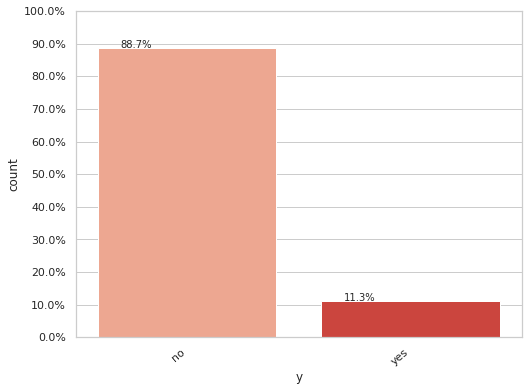

In [ ]:
  plt.figure(figsize=(8,6))
  Y = data["y"]
  total = len(Y)*1.
  ax=sns.countplot(x="y", data=data,palette = "Reds")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [ ]:
def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset ,palette = "Reds")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [ ]:
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y", palette = "Reds")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

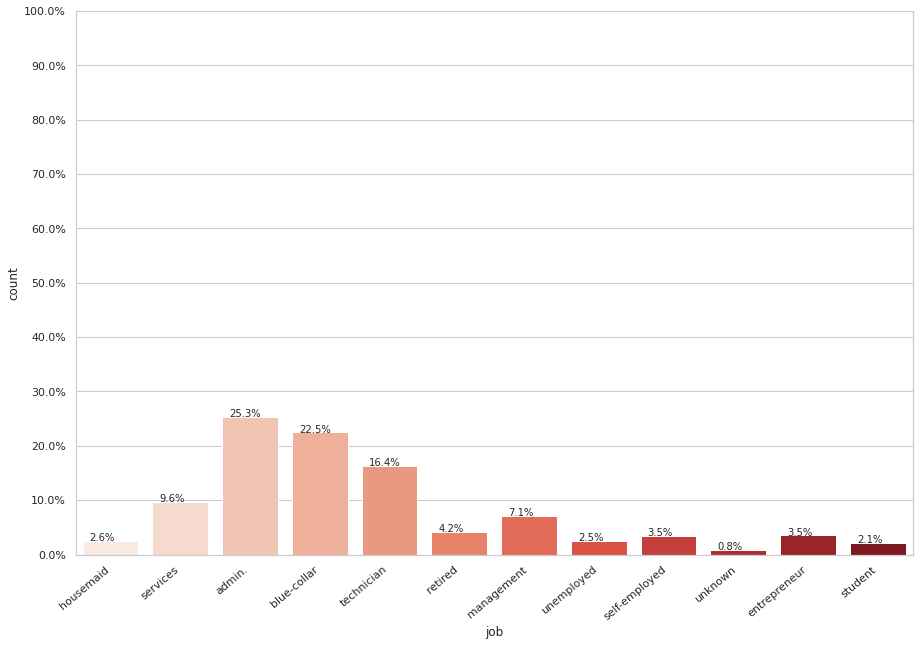

In [ ]:
countplot("job", data)

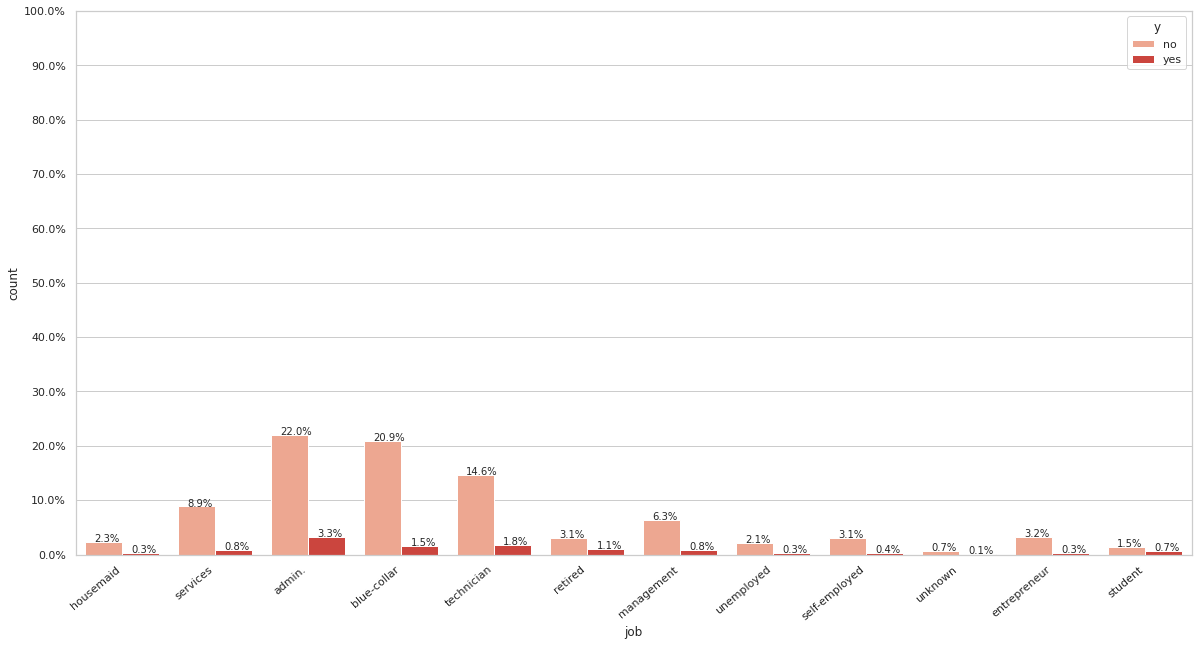

In [ ]:
countplot_withY("job", data)

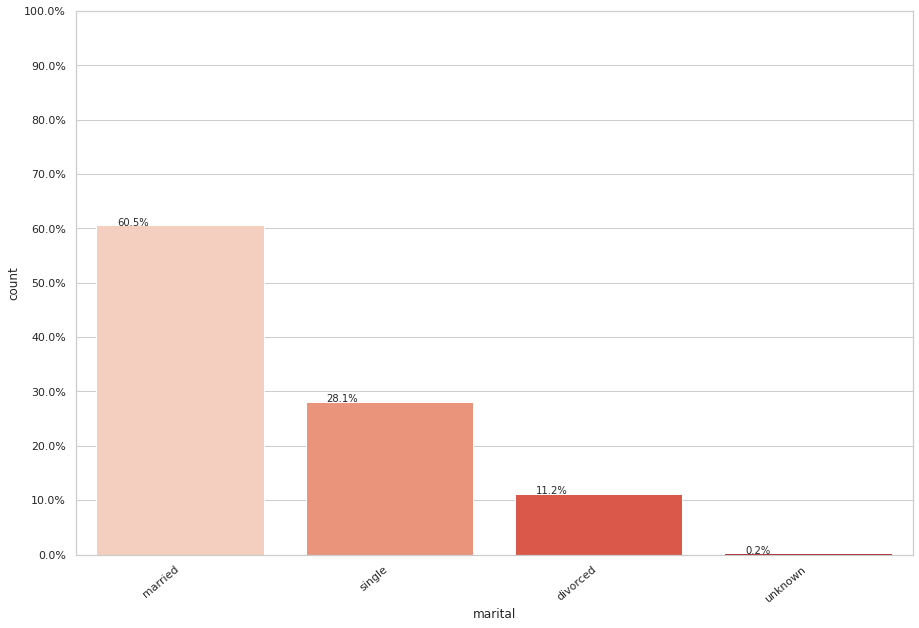

In [ ]:
countplot("marital",data)

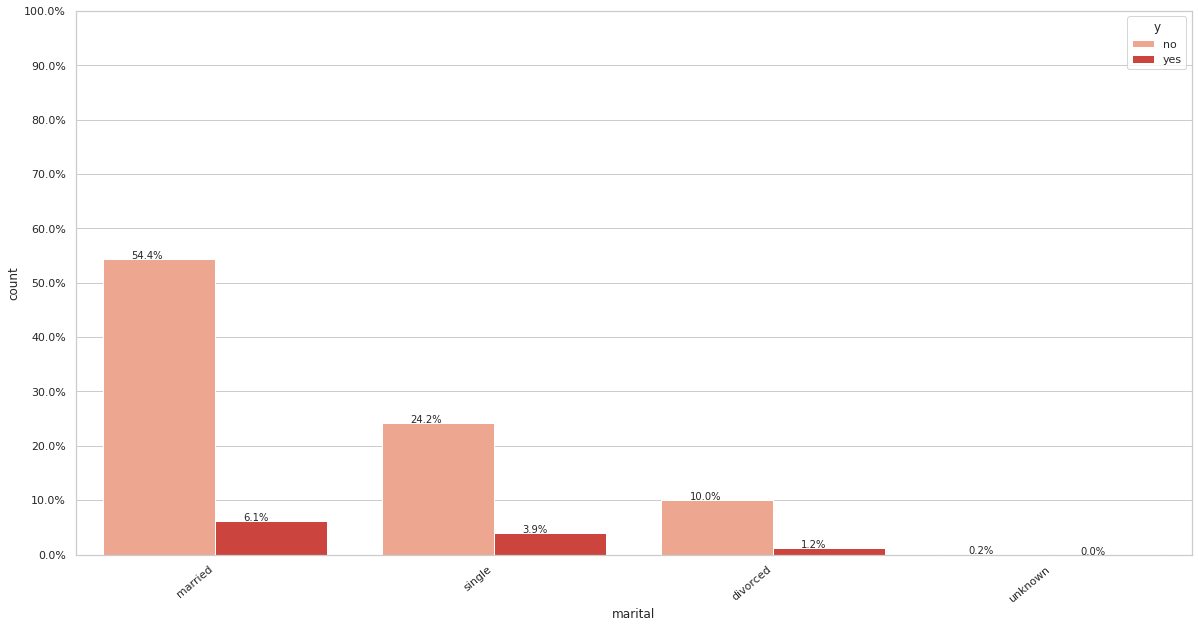

In [ ]:
countplot_withY("marital", data)

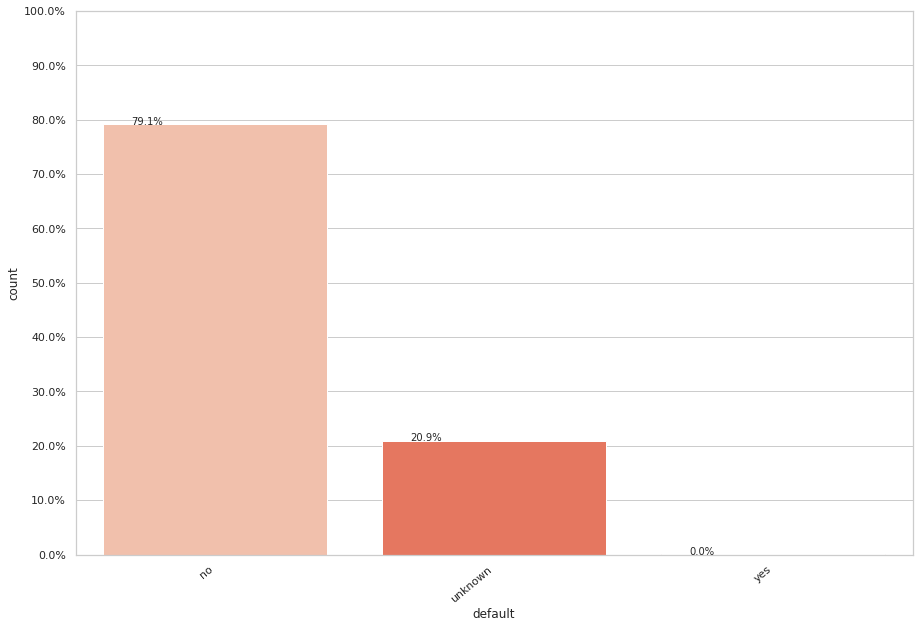

In [ ]:
countplot("default", data)

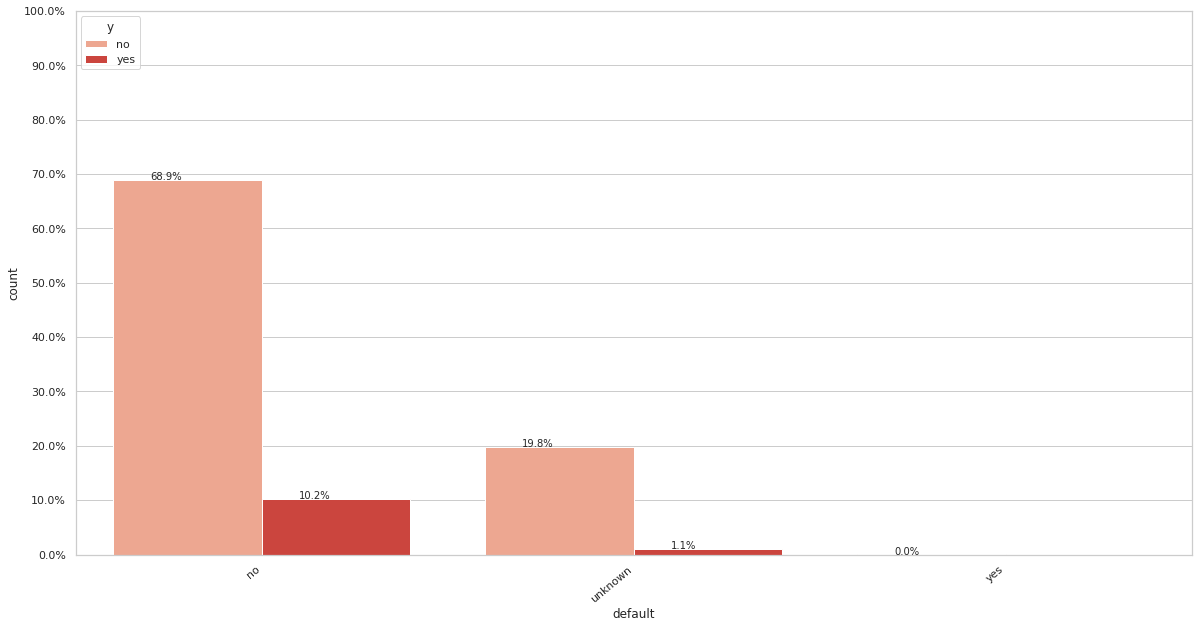

In [ ]:
countplot_withY("default", data)

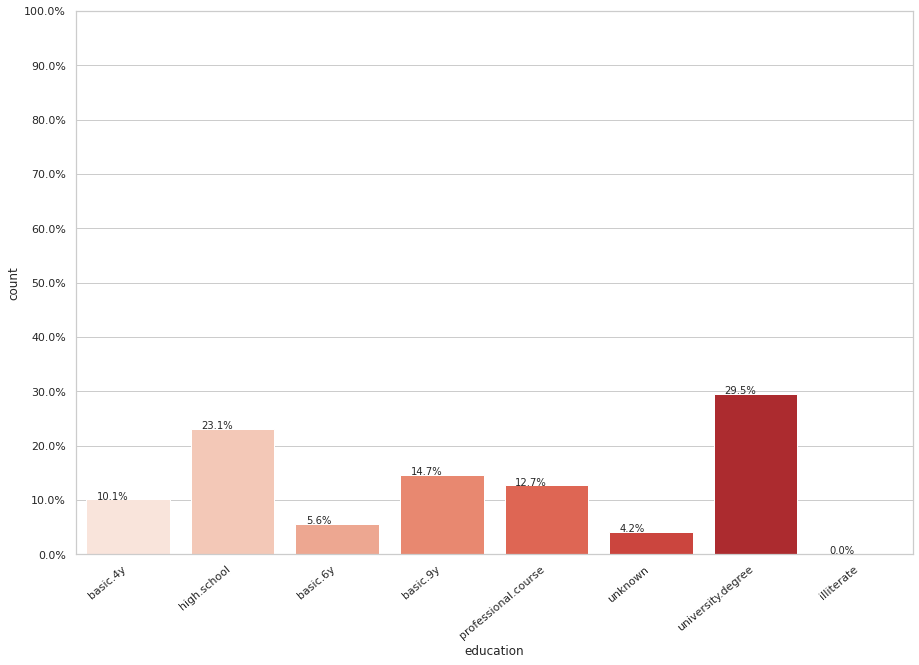

In [ ]:
countplot("education",data)

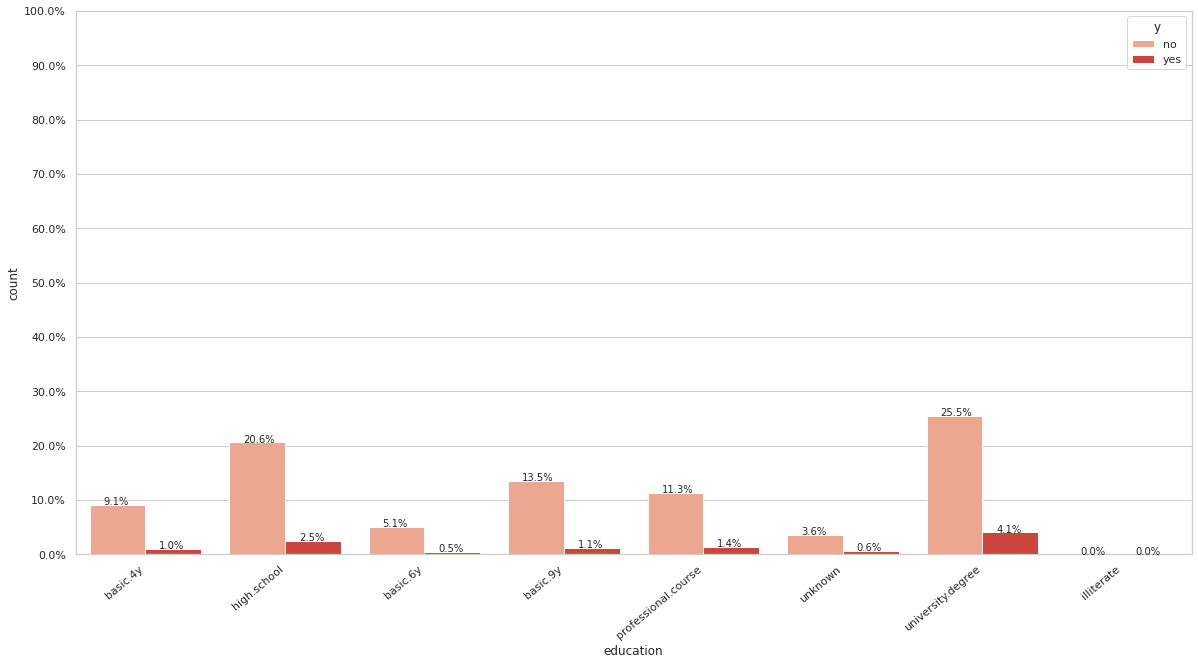

In [ ]:
countplot_withY("education", data)

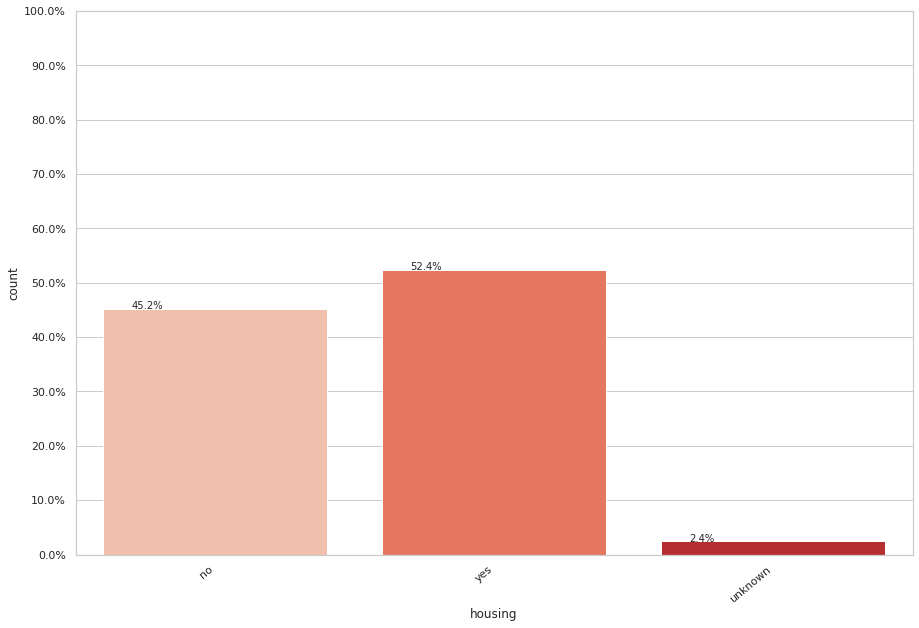

In [ ]:
countplot("housing", data)

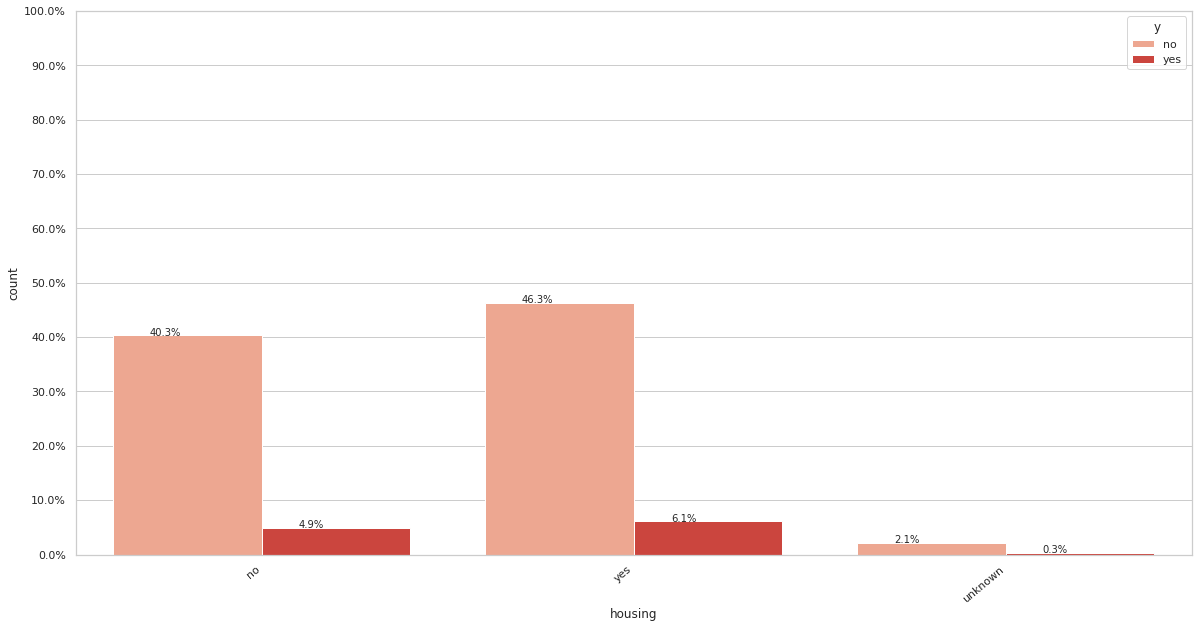

In [ ]:
countplot_withY("housing", data)

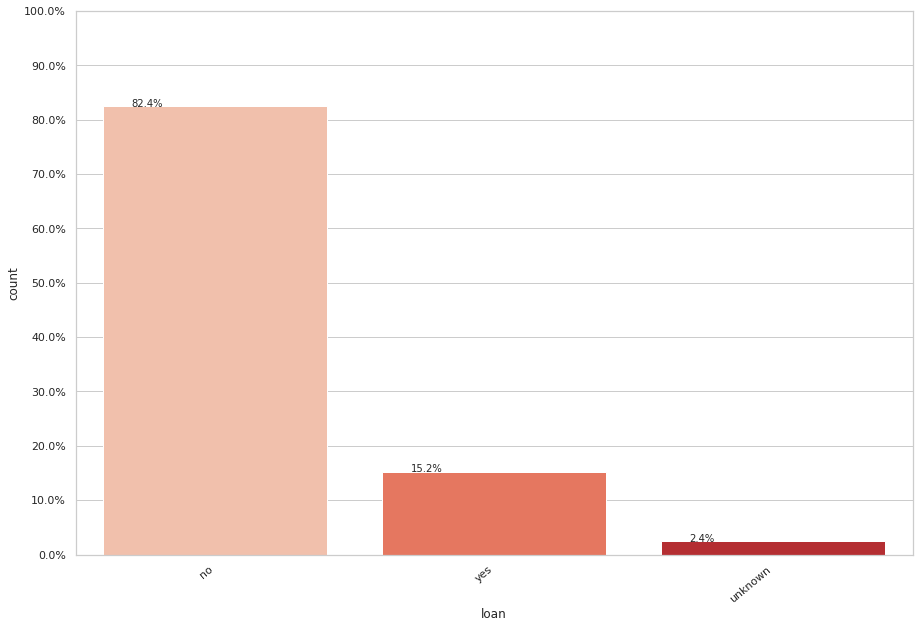

In [ ]:
countplot("loan", data)

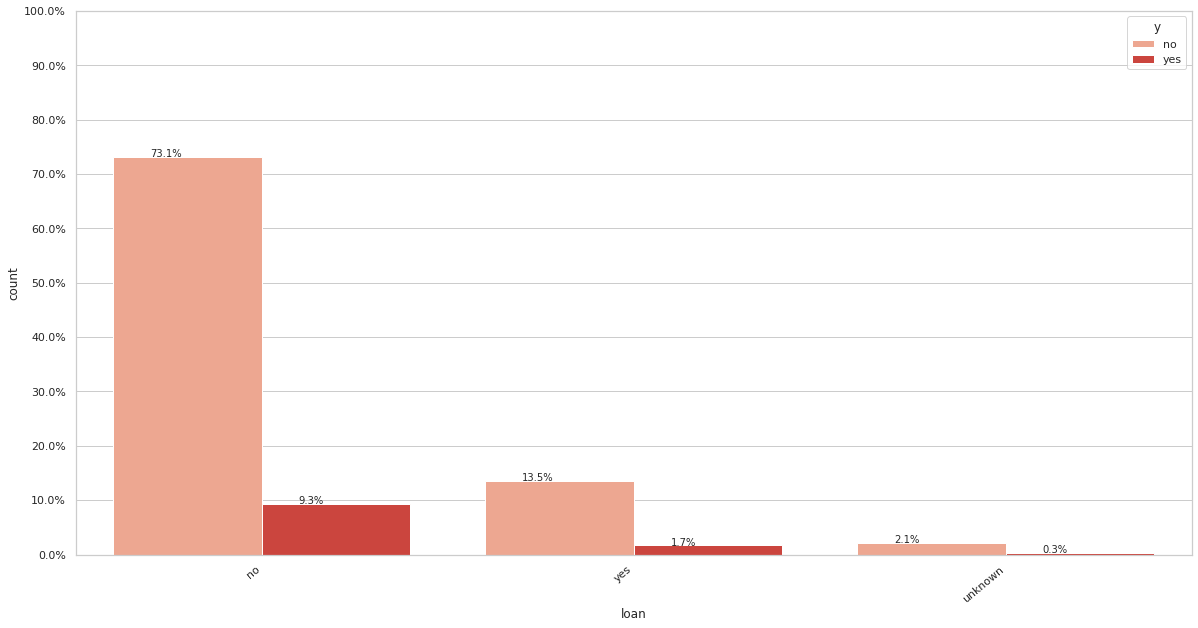

In [ ]:
countplot_withY("loan", data)

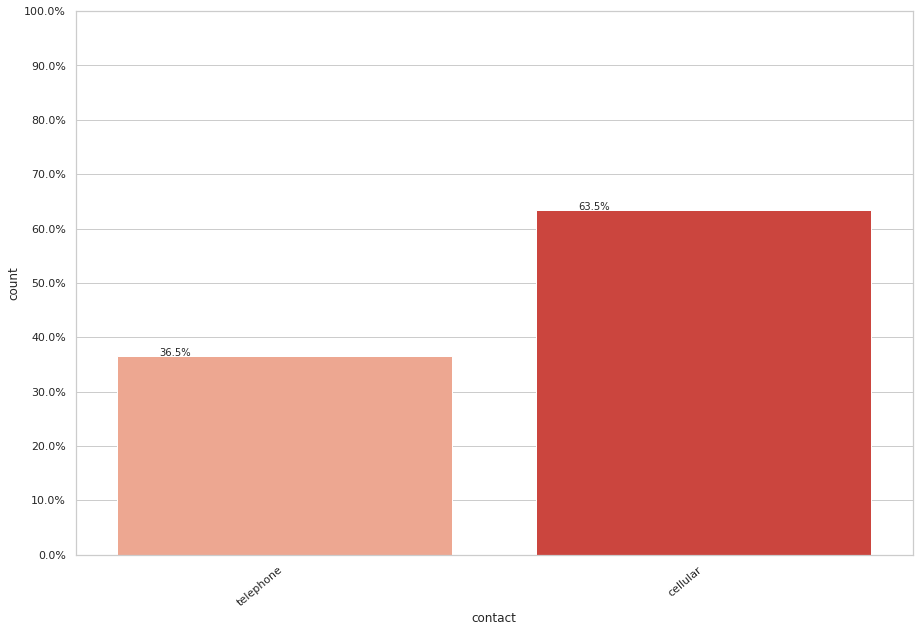

In [ ]:
countplot("contact", data)

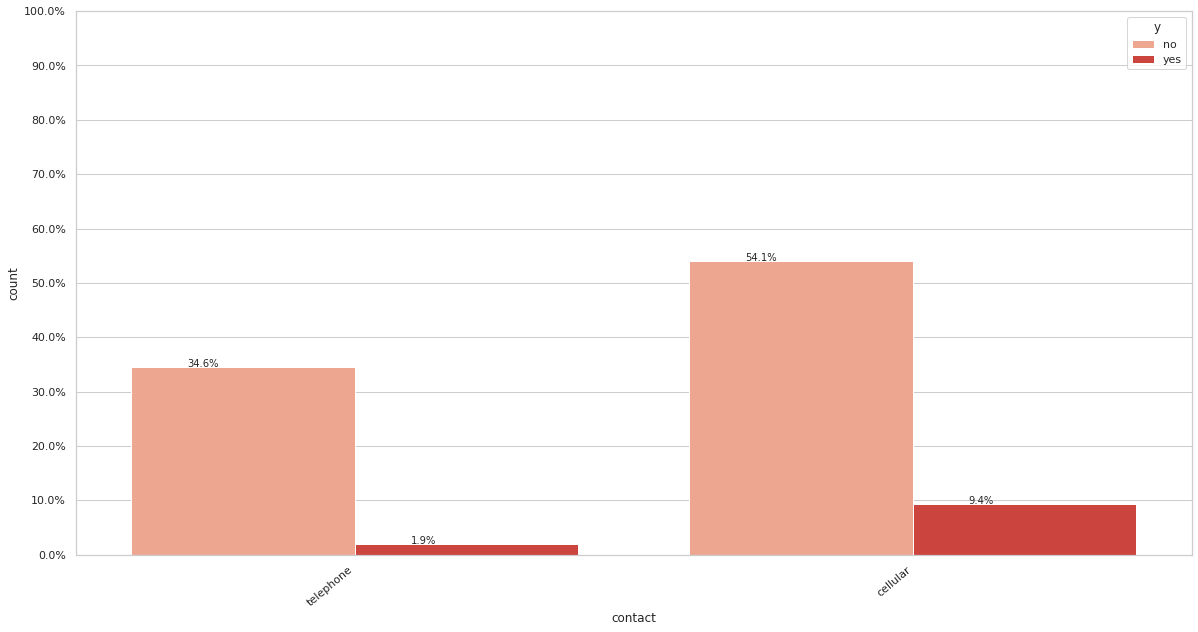

In [ ]:
countplot_withY("contact", data)

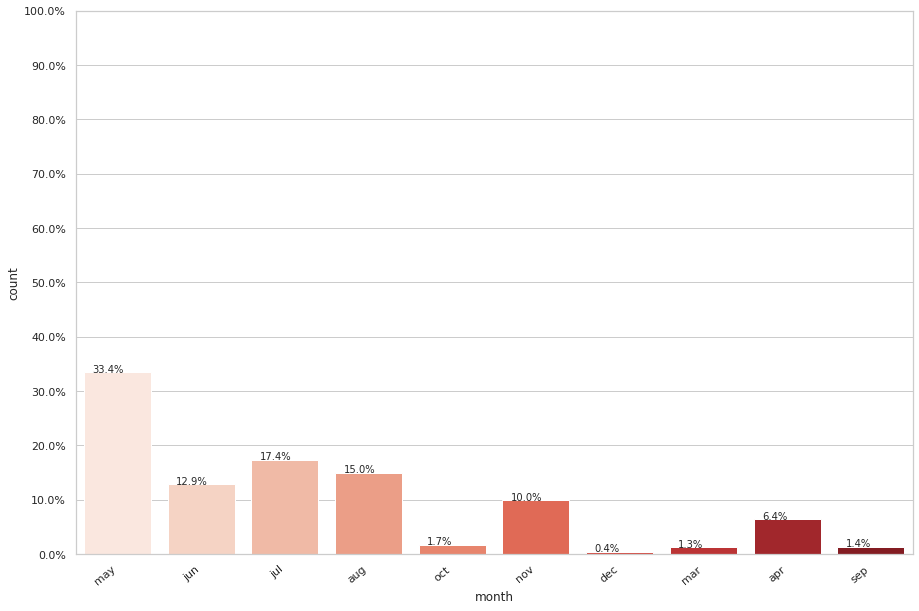

In [ ]:
countplot("month", data)

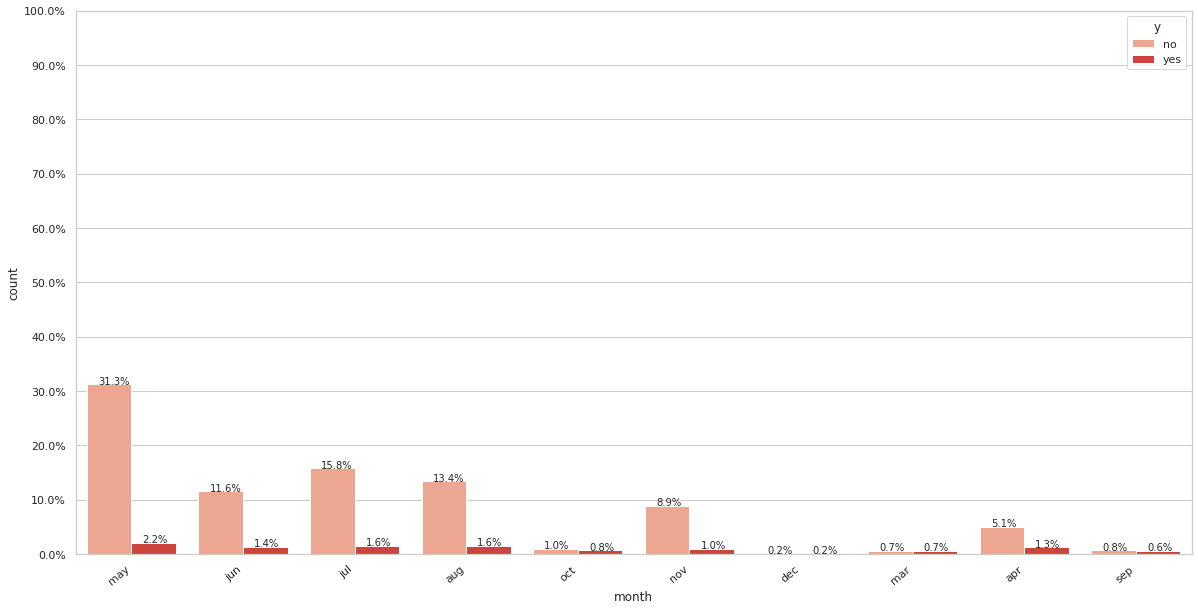

In [ ]:
countplot_withY("month", data)

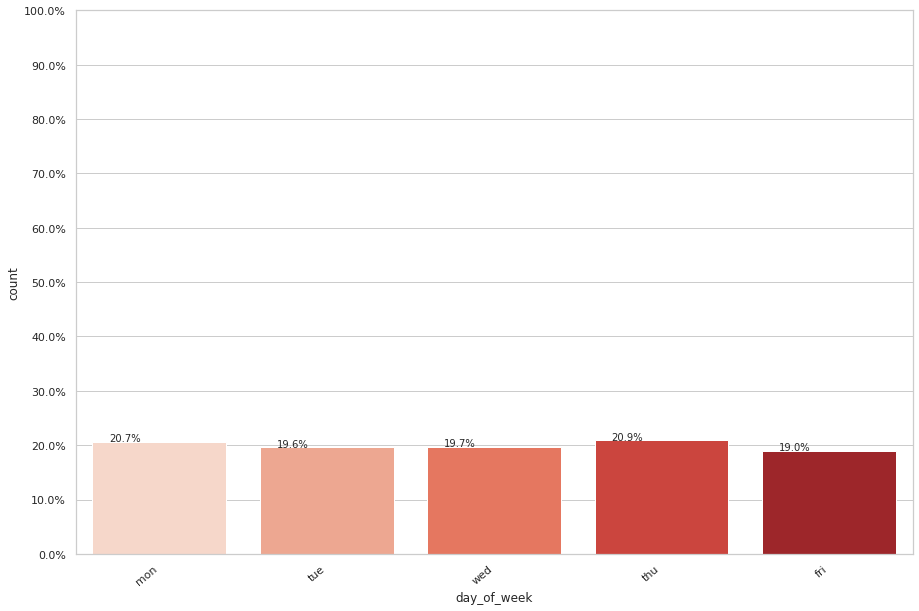

In [ ]:
countplot("day_of_week", data)

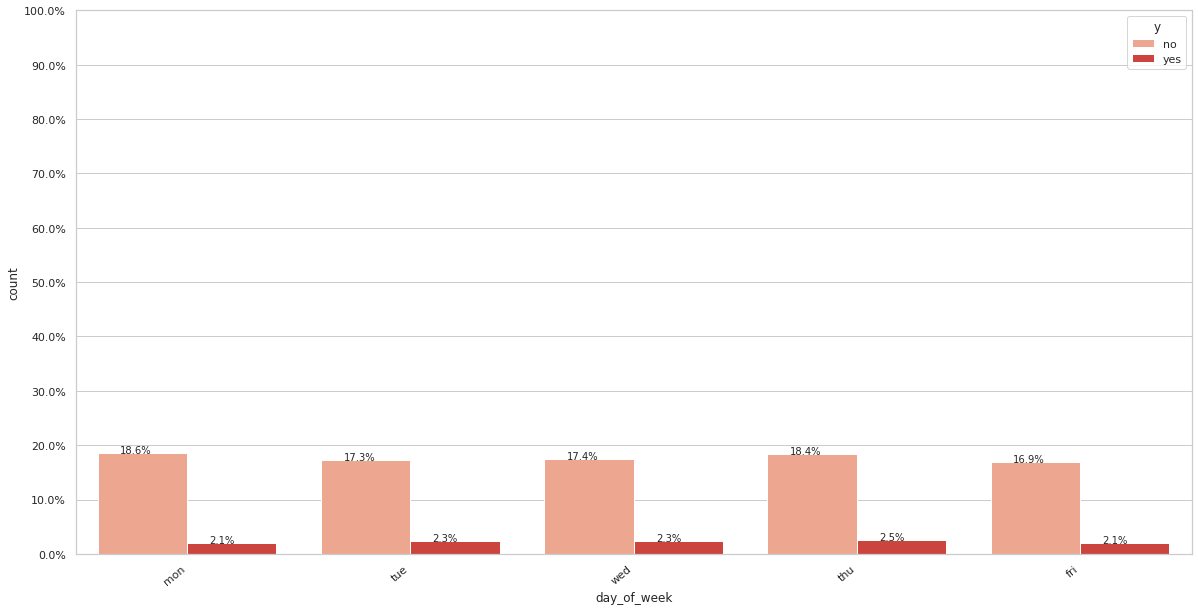

In [ ]:
countplot_withY("day_of_week", data)

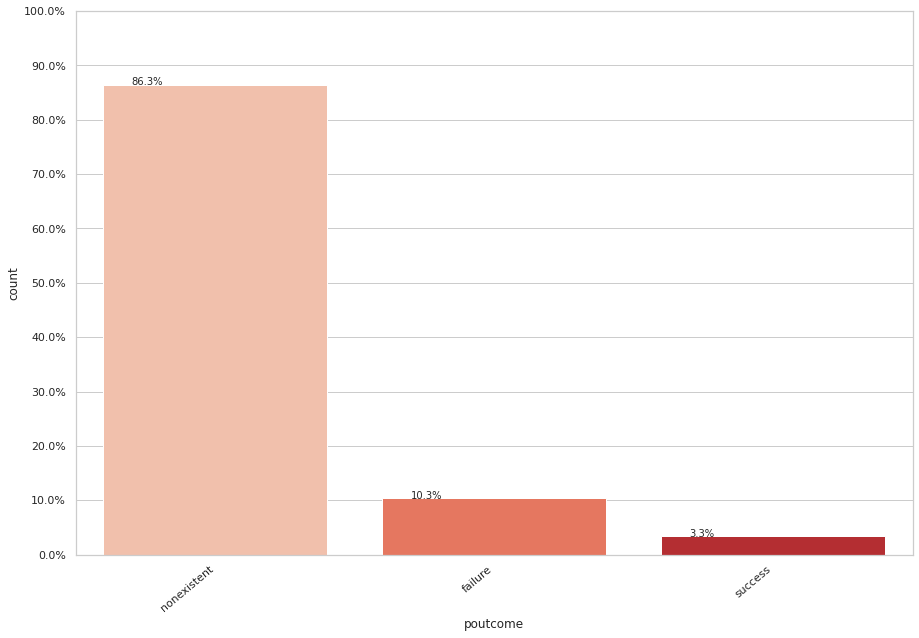

In [ ]:
countplot("poutcome", data)

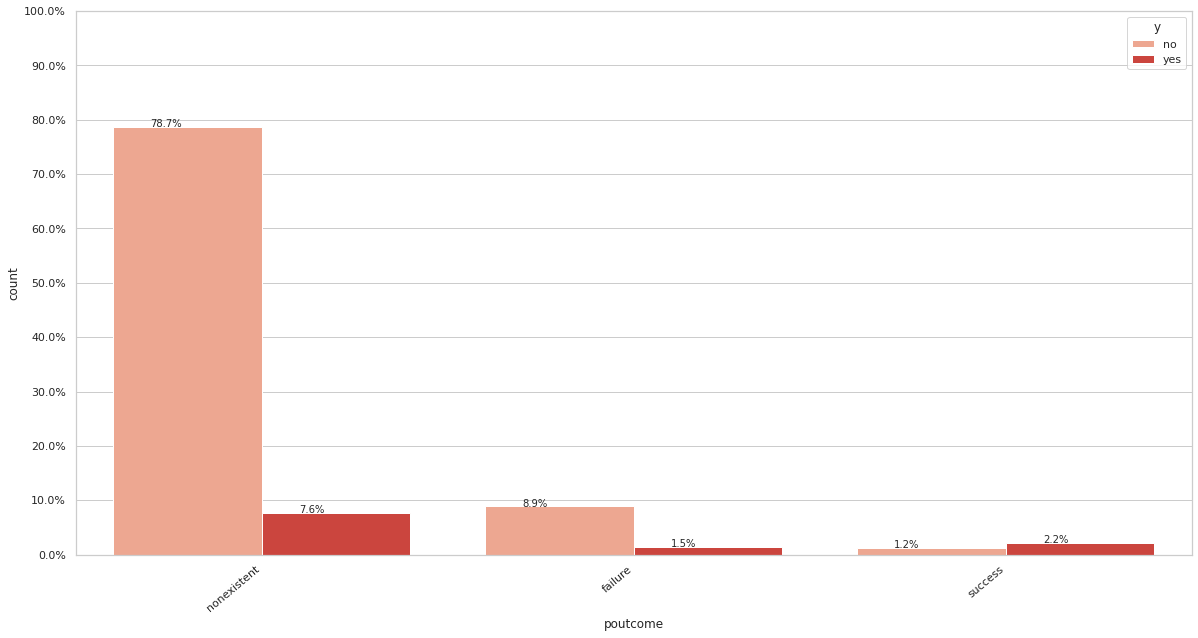

In [ ]:
countplot_withY("poutcome", data)

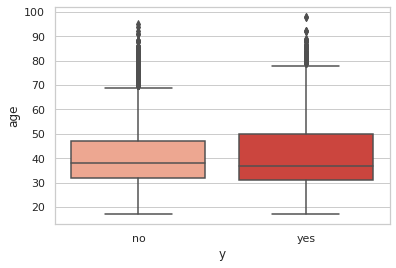

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="age",palette = "Reds")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


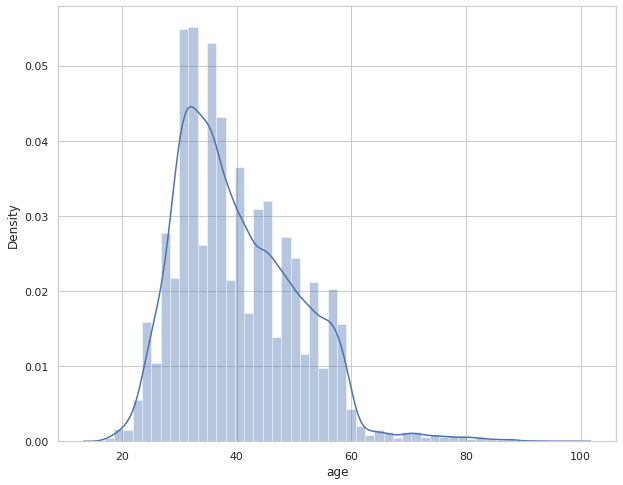

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data["age"])

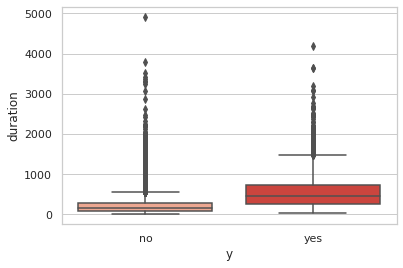

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="duration",palette = "Reds")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


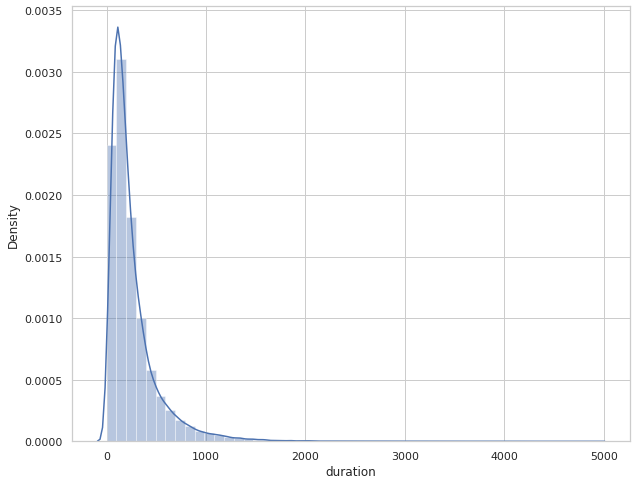

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data["duration"])
plt.show()

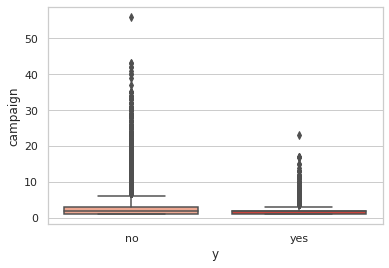

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="campaign",palette = "Reds")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


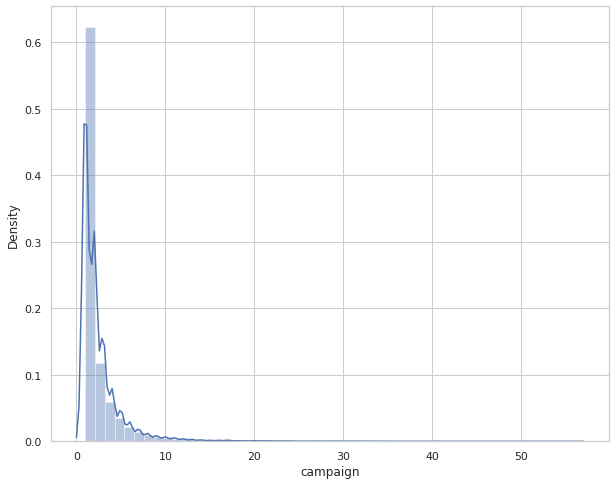

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["campaign"])
plt.show()

In [ ]:
data["pdays"].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [ ]:
data["pdays"].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

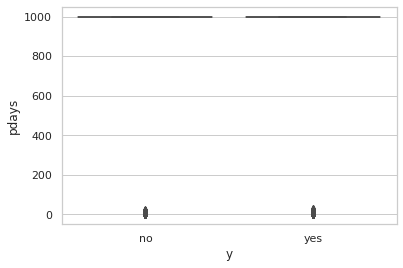

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="pdays")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


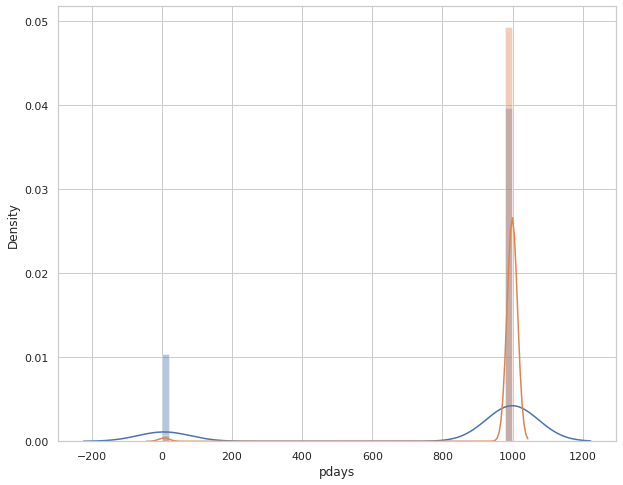

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data[data["y"]=="yes"]["pdays"])
sns.distplot(data[data["y"]=="no"]["pdays"])
plt.show()

In [ ]:
data["previous"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
data["previous"].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [ ]:
data[data["y"]=="yes"]["previous"].value_counts()

0    3141
1     967
2     350
3     128
4      38
5      13
6       3
Name: previous, dtype: int64

In [ ]:
data[data["y"]=="no"]["previous"].value_counts()

0    32422
1     3594
2      404
3       88
4       32
5        5
6        2
7        1
Name: previous, dtype: int64

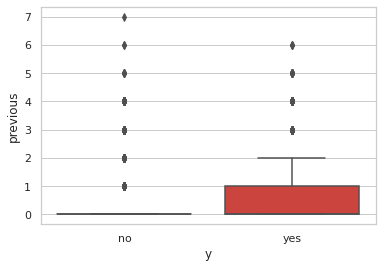

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="previous",palette = "Reds")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


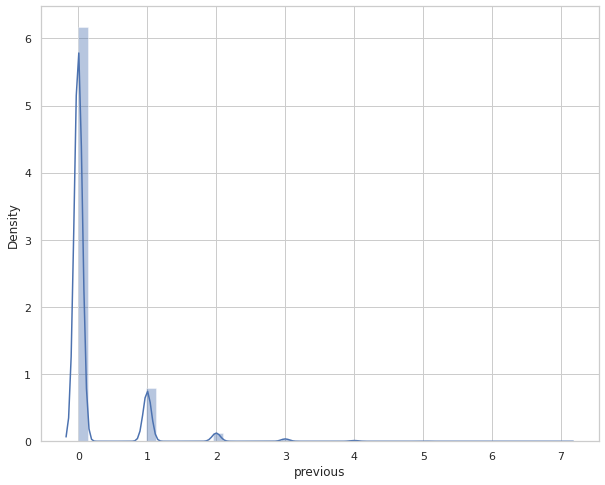

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["previous"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


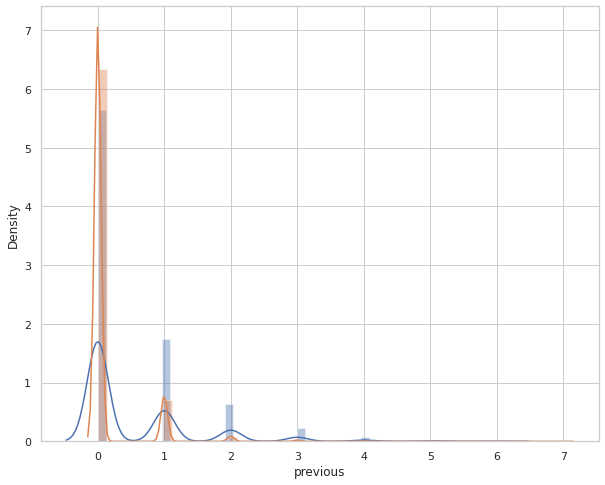

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data[data["y"]=="yes"]["previous"])
sns.distplot(data[data["y"]=="no"]["previous"])
plt.show()

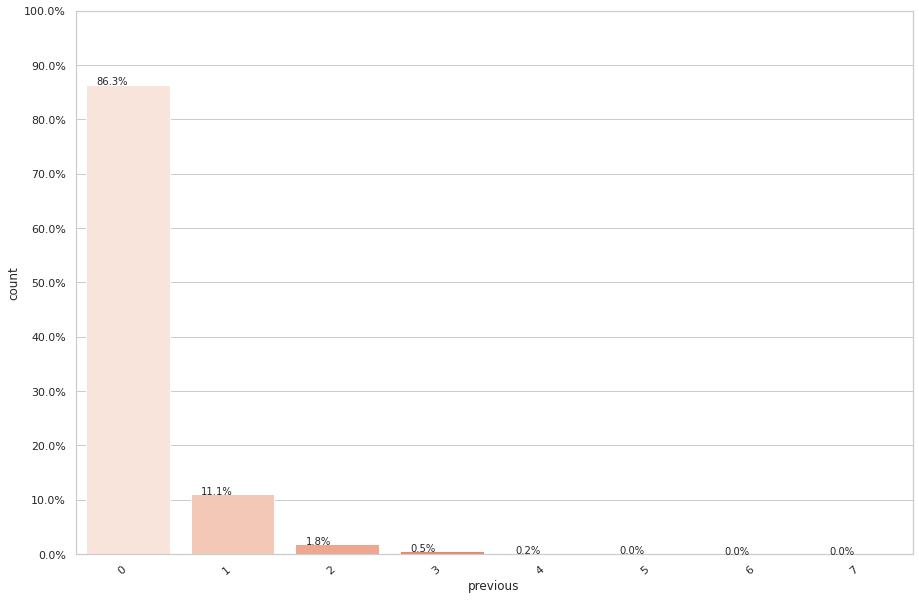

In [ ]:
countplot("previous", data)

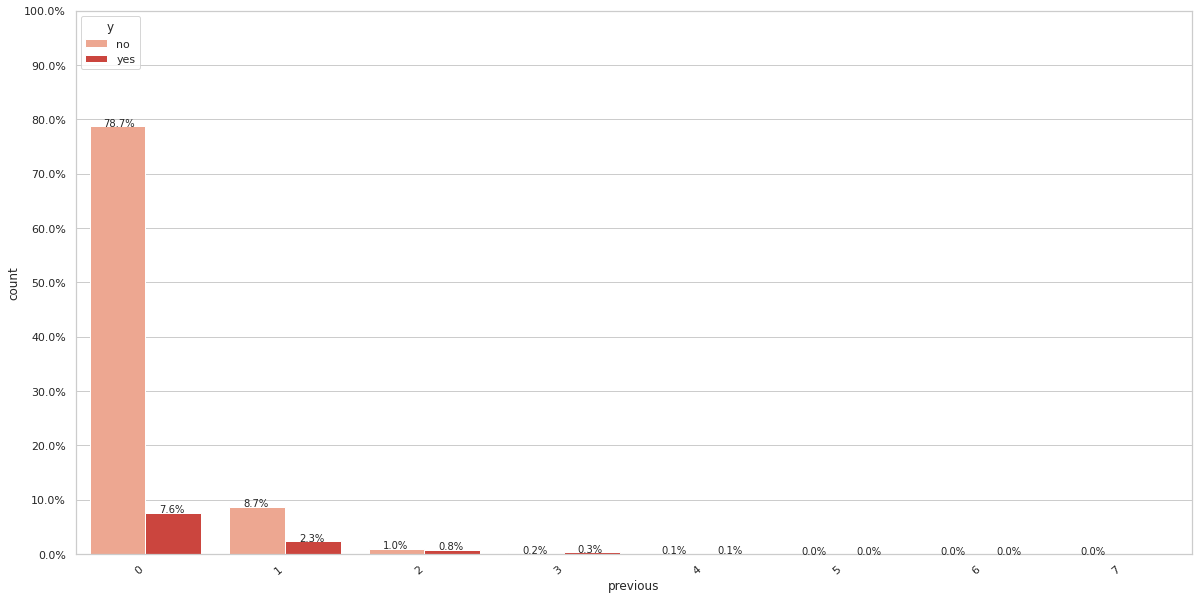

In [ ]:
countplot_withY("previous", data)

## emp.var.rate

In [ ]:
data["emp.var.rate"].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

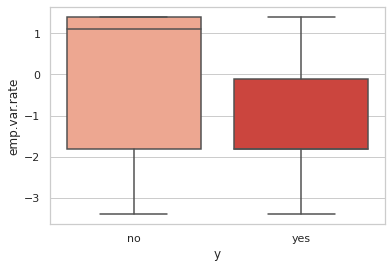

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="emp.var.rate",palette = "Reds")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


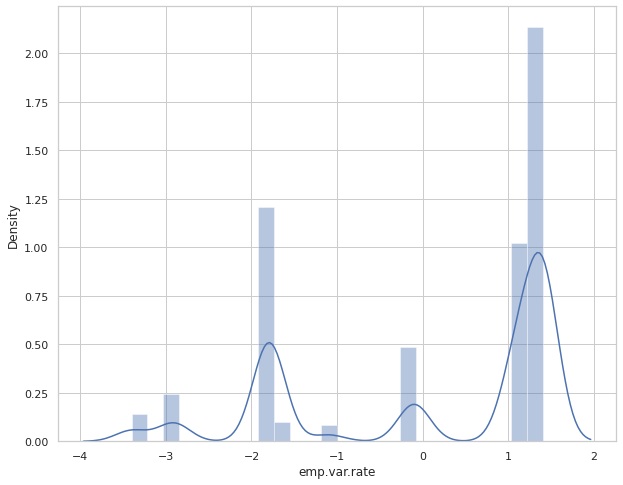

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["emp.var.rate"])
plt.show()

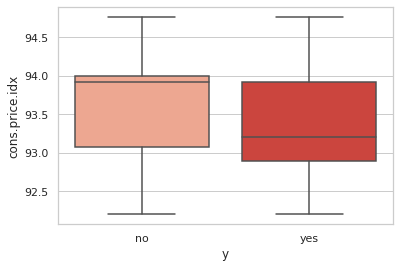

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="cons.price.idx",palette = "Reds")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


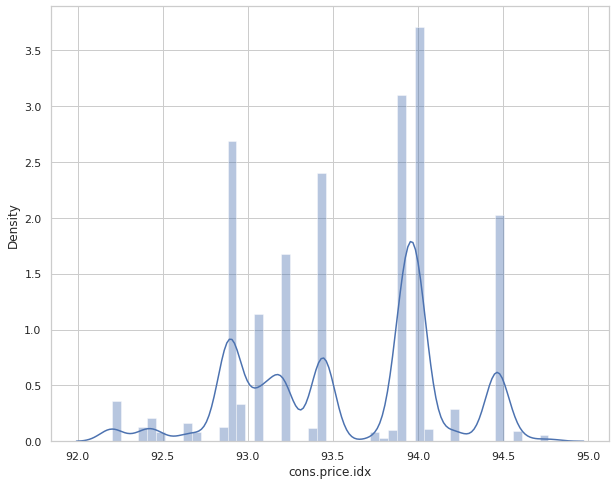

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["cons.price.idx"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


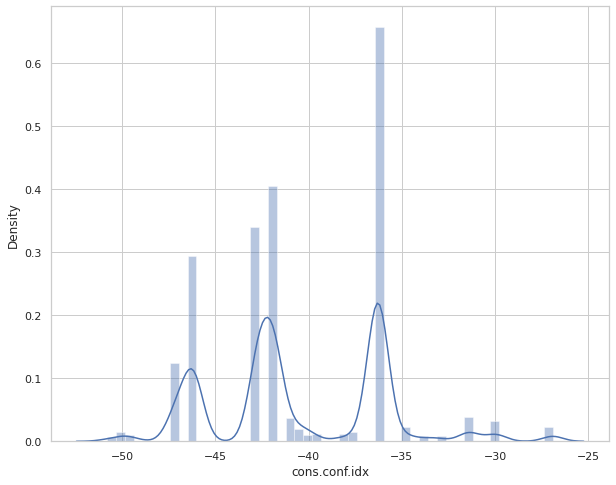

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["cons.conf.idx"])
plt.show()

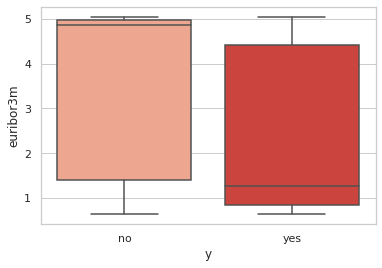

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="euribor3m",palette = "Reds")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


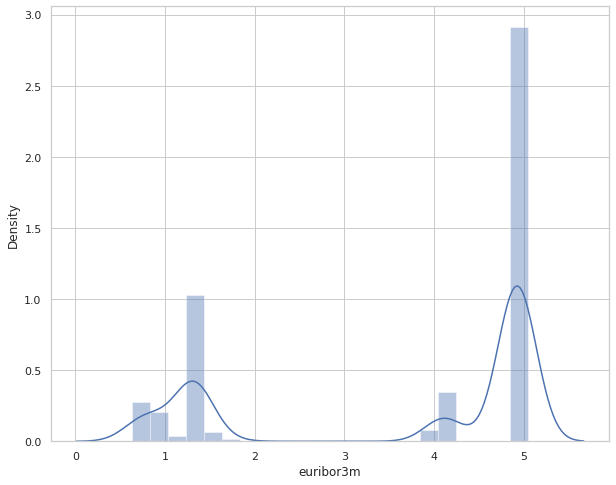

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["euribor3m"])
plt.show()